Bars and pubs with patron capacity in Melbourne in the past 20 years.

z5460776 Xingjun Liu

In [811]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point
from matplotlib.ticker import FuncFormatter
import geopy.distance



In [812]:
%matplotlib inline

In [813]:
plt.rcParams["figure.figsize"] = (10, 5)


In [814]:
saved_style_state = matplotlib.rcParams.copy()  

# booo

In [815]:
if os.path.isfile("bars-and-pubs-with-patron-capacity.csv"):
    filepath = "bars-and-pubs-with-patron-capacity.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")
pub_data = pd.read_csv(filepath,skiprows=1)
print("done")


loading from file
done


In [816]:
pub_data.columns

Index(['Census year', 'Block ID', 'Property ID', 'Base property ID',
       'Building address', 'CLUE small area', 'Trading name',
       'Business address', 'Number of patrons', 'Longitude', 'Latitude',
       'location'],
      dtype='object')

In [817]:
row_one = pub_data.iloc[1]
row_one


Census year                                           2002
Block ID                                                14
Property ID                                         103172
Base property ID                                    103172
Building address     31-39 Elizabeth Street MELBOURNE 3000
CLUE small area                            Melbourne (CBD)
Trading name                               Connells Tavern
Business address        35 Elizabeth Street MELBOURNE 3000
Number of patrons                                      350
Longitude                                       144.964322
Latitude                                        -37.817426
location              -37.81742610667125, 144.964321660097
Name: 1, dtype: object

In [818]:
area_counts = pub_data['CLUE small area'].value_counts()
print(area_counts)

CLUE small area
Melbourne (CBD)                 3198
Southbank                        415
Carlton                          293
North Melbourne                  287
Docklands                        213
Parkville                         69
West Melbourne (Residential)      66
East Melbourne                    43
Melbourne (Remainder)             42
Kensington                        42
South Yarra                       23
Port Melbourne                     5
Name: count, dtype: int64


In [819]:
land_type_df = pd.DataFrame(list(Land_type.items()), columns=['CLUE small area', 'Land Type'])

In [820]:
merged_data = pd.merge(pub_data, land_type_df, on='CLUE small area')

In [821]:
Land_type = {
    'Melbourne (CBD)': 'Commercial',
    'Carlton': 'Mixed',
    'Parkville': 'Residential',
    'North Melbourne': 'Mixed',
    'East Melbourne': 'Residential',
    'Southbank': 'Commercial',
    'Melbourne (Remainder)': 'Mixed',
    'South Yarra': 'Residential',
    'Docklands': 'Commercial',
    'West Melbourne (Residential)': 'Residential',
    'Kensington': 'Residential',
    'Port Melbourne': 'Industrial'
}
pub_data['Land Type'] = pub_data['CLUE small area'].map(Land_type)
print(pub_data[['CLUE small area', 'Land Type']].head())


   CLUE small area   Land Type
0  Melbourne (CBD)  Commercial
1  Melbourne (CBD)  Commercial
2  Melbourne (CBD)  Commercial
3  Melbourne (CBD)  Commercial
4  Melbourne (CBD)  Commercial


In [822]:
land_type_df = pd.DataFrame(list(Land_type.items()), columns=['CLUE small area', 'Land Type'])


In [823]:
merged_data.head()

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Trading name,Business address,Number of patrons,Longitude,Latitude,location,Land Type
0,2002,11,108972,108972,10-22 Spencer Street MELBOURNE 3000,Melbourne (CBD),Explorers Inn,10-22 Spencer Street MELBOURNE 3000,50,144.955254,-37.820511,"-37.82051068881513, 144.95525416628004",Commercial
1,2002,14,103172,103172,31-39 Elizabeth Street MELBOURNE 3000,Melbourne (CBD),Connells Tavern,35 Elizabeth Street MELBOURNE 3000,350,144.964322,-37.817426,"-37.81742610667125, 144.964321660097",Commercial
2,2002,15,103944,103944,277-279 Flinders Lane MELBOURNE 3000,Melbourne (CBD),De Biers,"Unit 1, Basement , 277 Flinders Lane MELBOURNE...",400,144.965307,-37.817242,"-37.81724194023457, 144.96530699086",Commercial
3,2002,16,103938,103938,187 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Adelphi Hotel,187 Flinders Lane MELBOURNE 3000,80,144.968385,-37.816360,"-37.81635974400108, 144.9683846004515",Commercial
4,2002,17,103925,103925,121-123 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Velour,"Unit 1, Gnd & Bmt , 121 Flinders Lane MELBOURN...",350,144.970523,-37.815674,"-37.815673646380745, 144.97052296371248",Commercial


In [824]:
merged_data["CLUE small area"].value_counts()

CLUE small area
Melbourne (CBD)                 3198
Southbank                        415
Carlton                          293
North Melbourne                  287
Docklands                        213
Parkville                         69
West Melbourne (Residential)      66
East Melbourne                    43
Melbourne (Remainder)             42
Kensington                        42
South Yarra                       23
Port Melbourne                     5
Name: count, dtype: int64

In [825]:
plt.rcParams["figure.figsize"] = (20, 10)

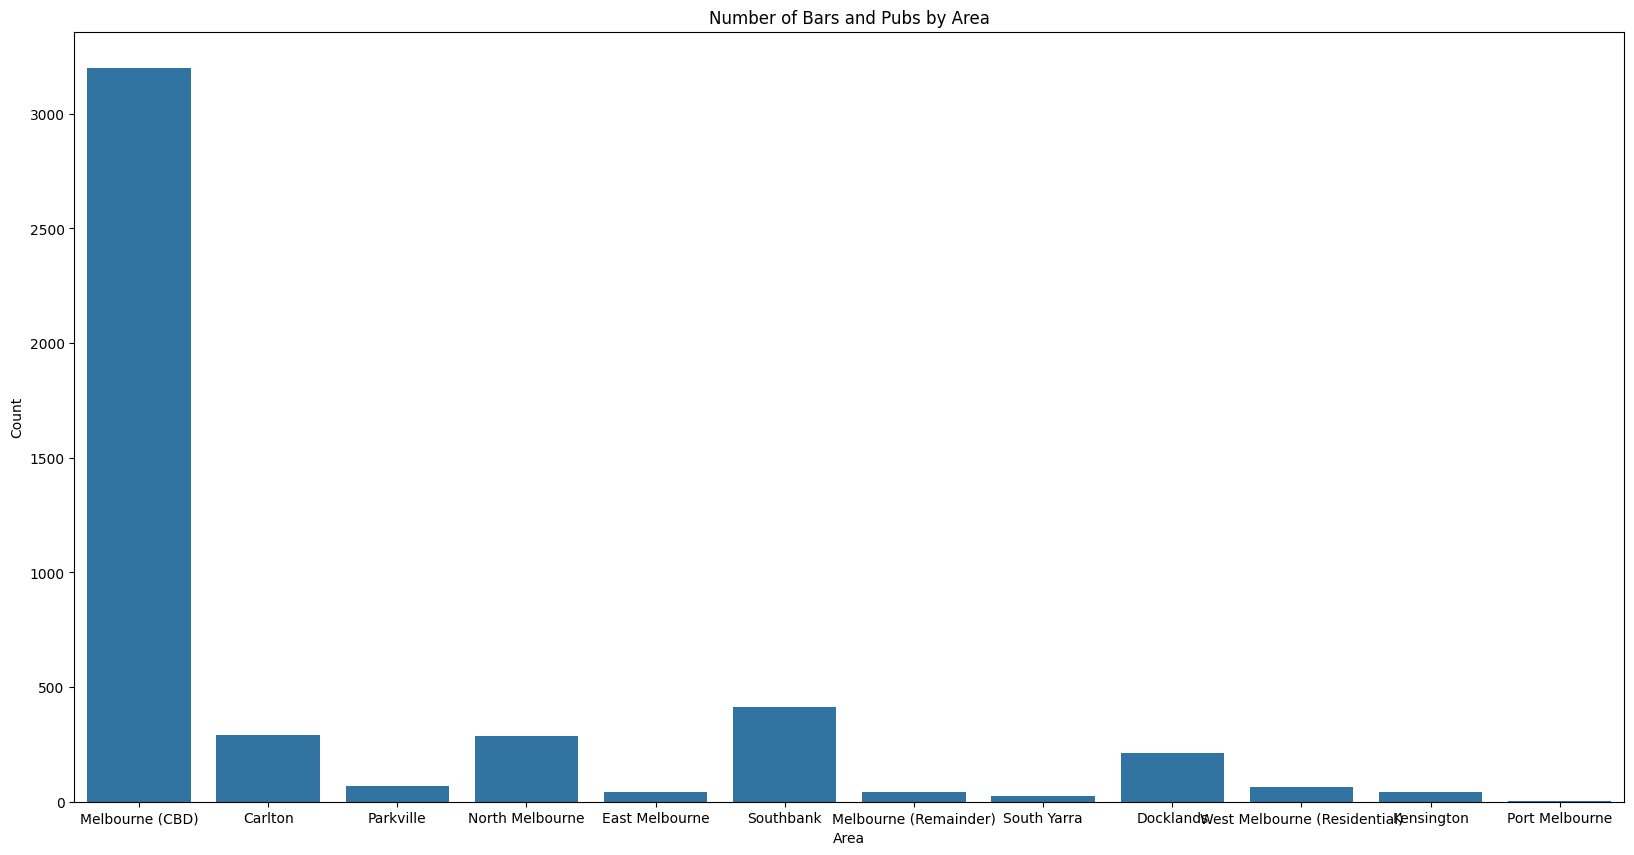

In [826]:
sns.countplot(x='CLUE small area', data=merged_data)
plt.title('Number of Bars and Pubs by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Number of patrons in different years and areas')

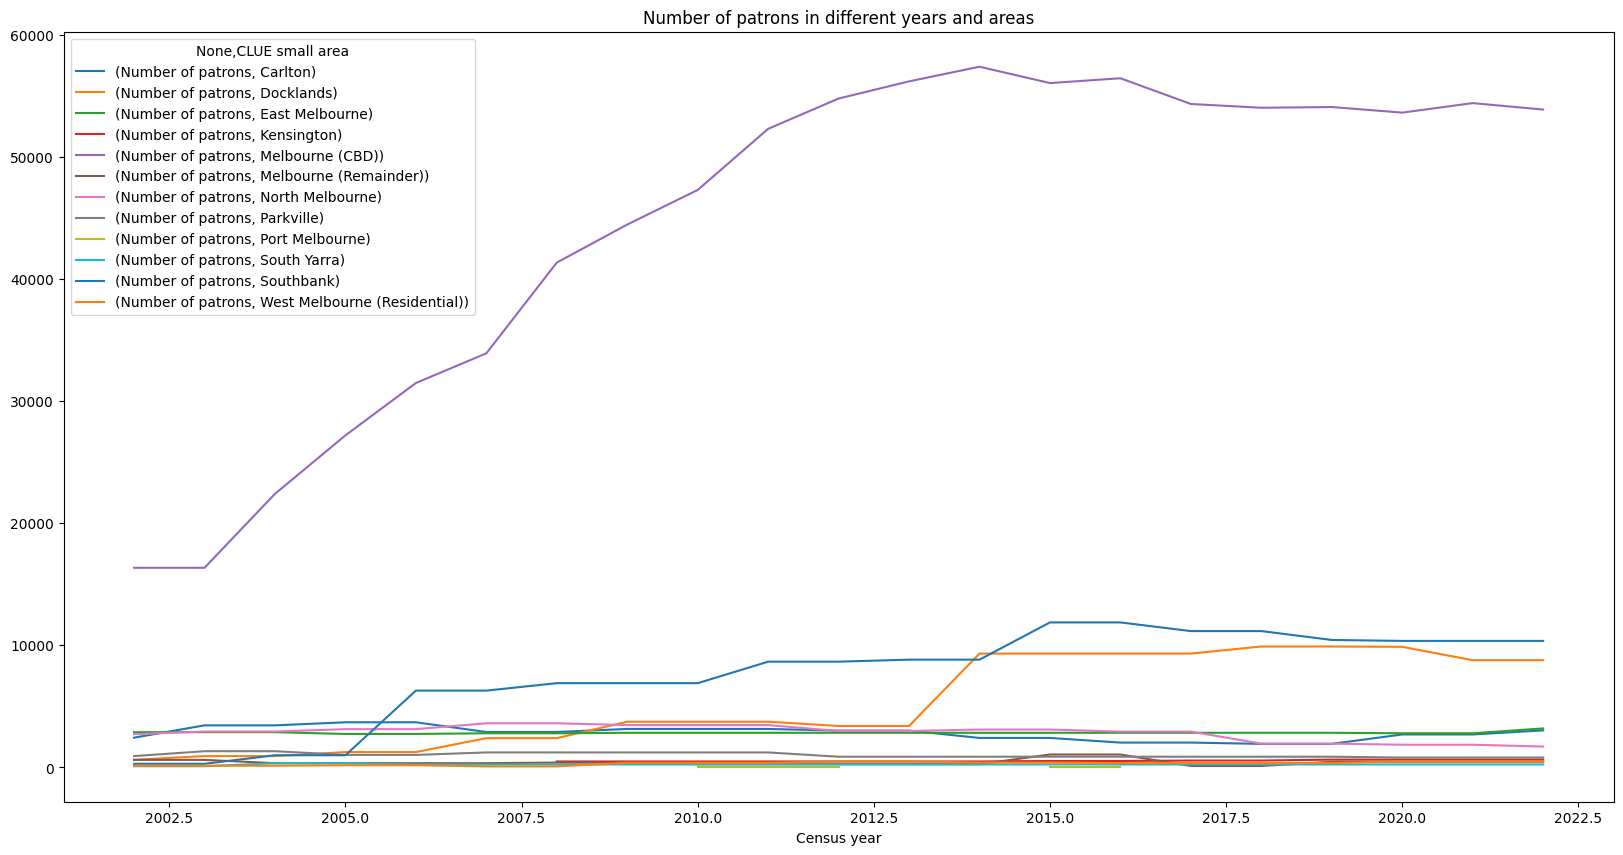

In [827]:
merged_data[["Census year", "CLUE small area", "Number of patrons"]].groupby(["Census year", "CLUE small area"]).sum().unstack().plot()
plt.title('Number of patrons in different years and areas')

<Axes: ylabel='Census year'>

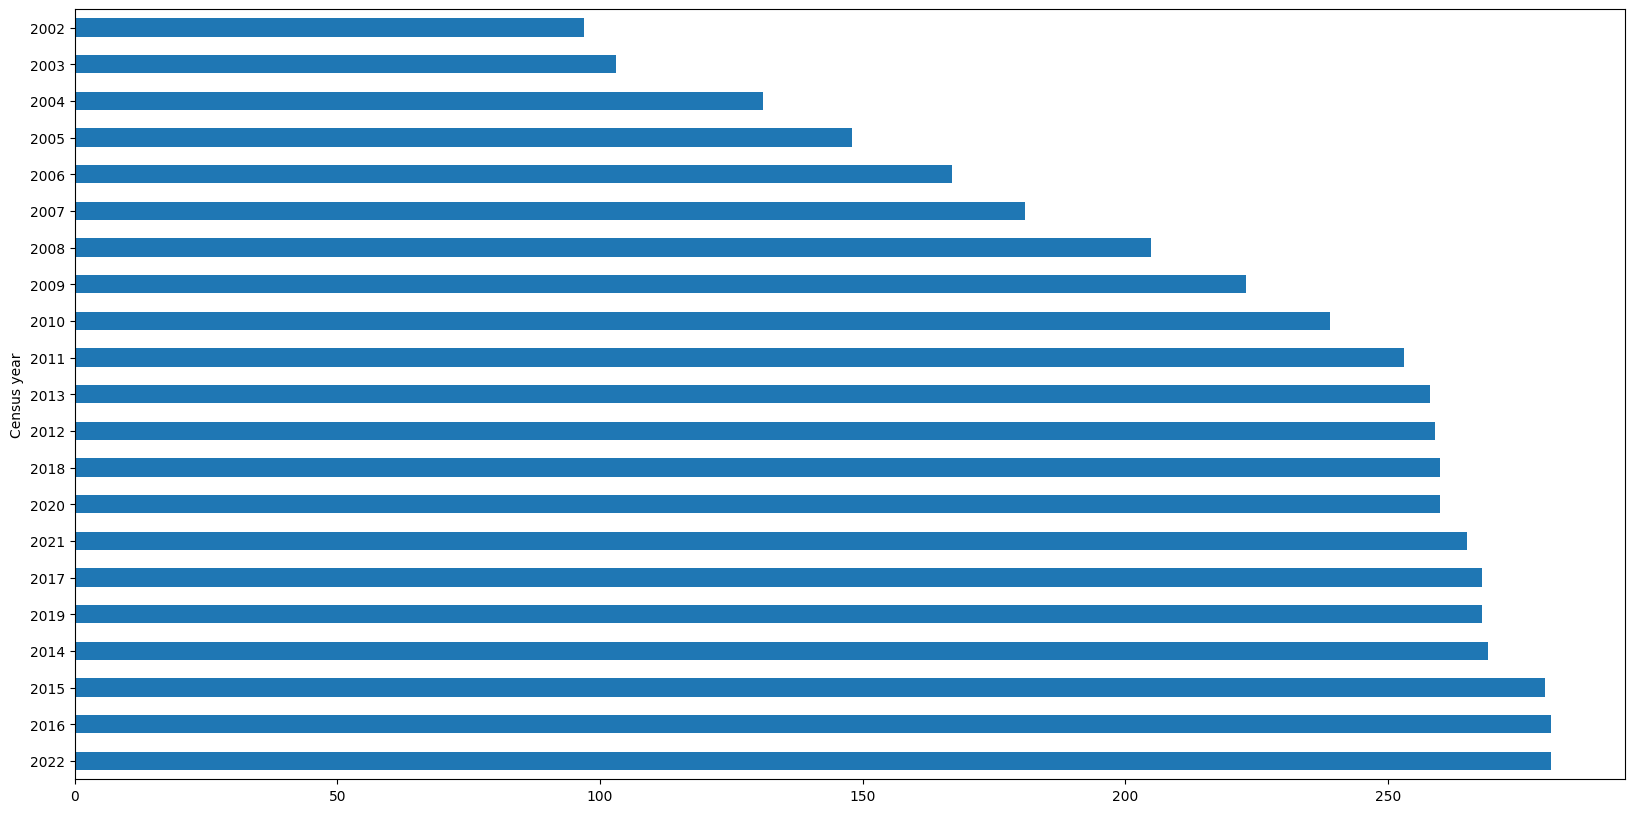

In [828]:
pub_data['Census year'].value_counts().plot(kind="barh")

In [769]:
shp_file_name = "/Users/stella/1161/star_data/my map/property-boundaries.shp"
zip_file_name = "boundaries.zip"
web_file_path = (
    "https://discover.data.vic.gov.au/dataset/"
)

filepath = "bars-and-pubs-with-patron-capacity.csv"

In [770]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [771]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [772]:
merged_data = pd.DataFrame({
    'CLUE small area': ['Melbourne (CBD)', 'Carlton', 'Parkville', 'Carlton', 'Southbank'],
    'Land Type': ['Commercial', 'Mixed', 'Residential', 'Mixed', 'Commercial'],
    'longitude': [144.955254, 144.964322, 144.965307, 144.968358, 144.970523],
    'latitude': [-37.820511, -37.817426, -37.817242, -37.816360, -37.815674]})

In [773]:
mel_prop = gpd.read_file("my map/property-boundaries.shp")

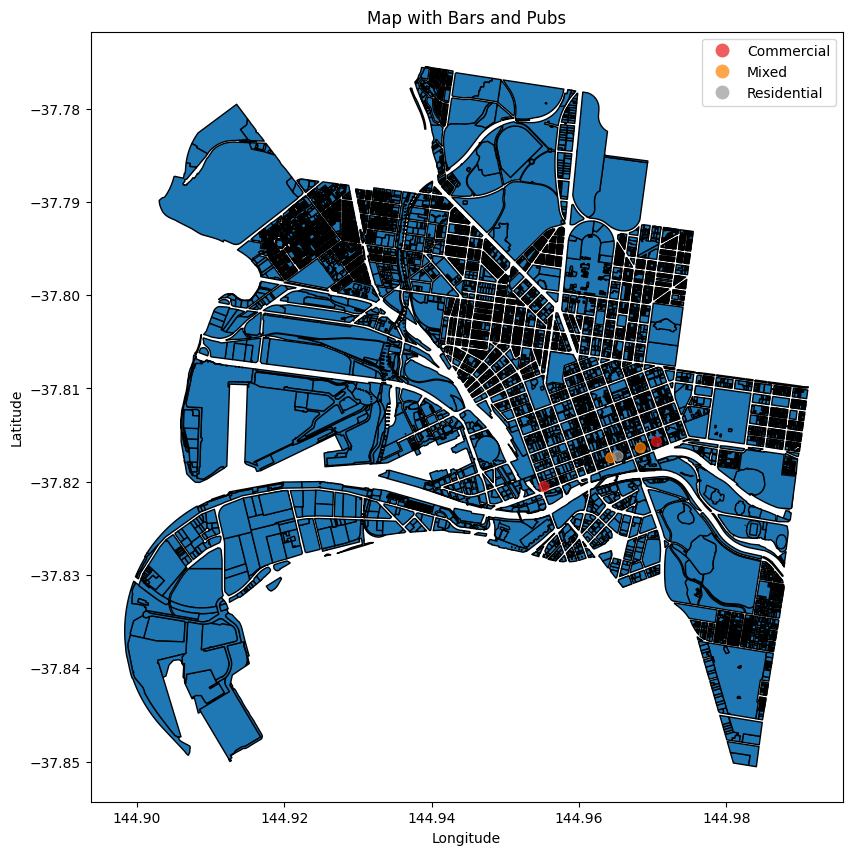

In [720]:
# Draw boundary data
ax = mel_prop.plot(edgecolor='k', figsize=(10, 10))
# Mapping location data
gdf.plot(ax=ax, column='Land Type', cmap='Set1', legend=True, markersize=50, alpha=0.7)

plt.title('Map with Bars and Pubs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [774]:
burbs = gpd.read_file(shp_file_name)       
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
burbs.sample(2)

,geometry
544,"POLYGON ((144.956 -37.805, 144.956 -37.805, 14..."
6722,"POLYGON ((144.931 -37.798, 144.931 -37.798, 14..."


In [778]:
cols_to_drop = ["LOC_PID", "LC_PLY_PID", "DT_CREATE	"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(2)

,geometry
0,"POLYGON ((144.941 -37.785, 144.942 -37.785, 14..."
1,"POLYGON ((144.941 -37.785, 144.942 -37.784, 14..."


<Axes: >

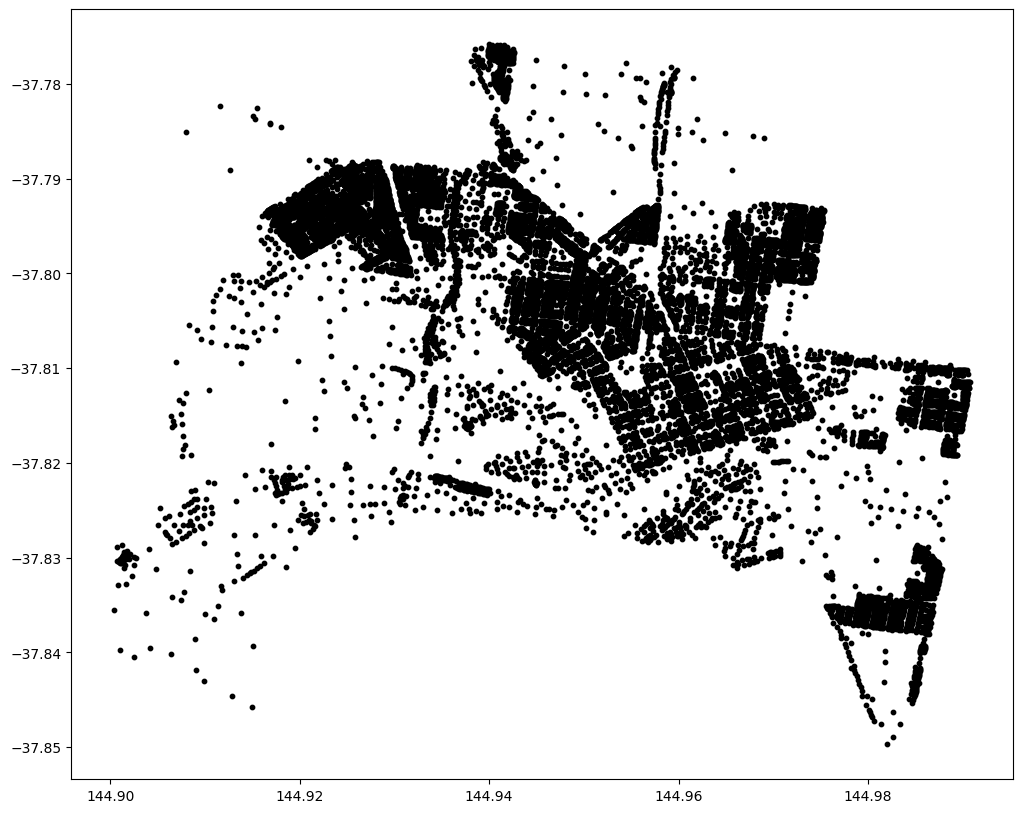

In [780]:
burbs.centroid.plot(color='black', markersize=10)